In [5]:
# Import scaffoldgraph
import scaffoldgraph as sg

# Import networkx
import networkx as nx

# Import plotting tools
import matplotlib.pyplot as plt

# Import rdkit
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

import random
import os



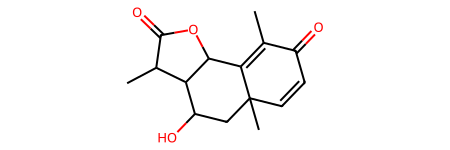

In [2]:
# Artemisin
mol = Chem.MolFromSmiles('CC1C2C(CC3(C=CC(=O)C(=C3C2OC1=O)C)C)O')

# Tenofovir
# mol = Chem.MolFromSmiles('CC(CN1C=NC2=C(N=CN=C21)N)OCP(=O)(O)O')

# Paracetamol
# mol = Chem.MolFromSmiles('CC(=O)NC1=CC=C(C=C1)O')

# Paracetamol Suplhate (https://www.molinstincts.com/structure/paracetamol-sulphate-cstr-CT1102892514.html)
# mol = Chem.MolFromSmiles("CC(=O)Nc2ccc(OS(=O)(=O)Oc1ccc(NC(C)=O)cc1)cc2")

# Remdesivir
# mol = Chem.MolFromSmiles('CC1(OC2C(OC(C2O1)(C#N)C3=CC=C4N3N=CN=C4N)CO)C')

mol

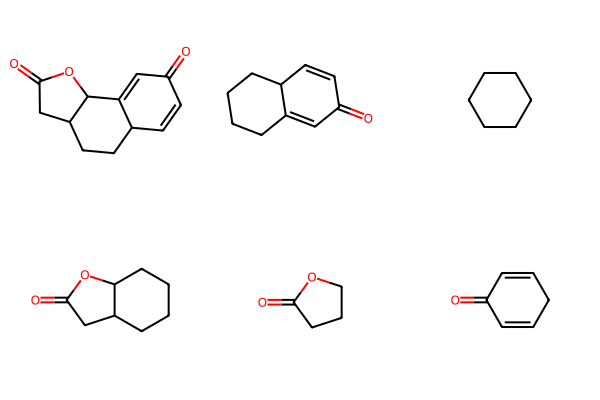

In [3]:
frags = sg.get_all_murcko_fragments(mol, break_fused_rings=True)
Draw.MolsToGridImage(frags)

In [4]:
[Chem.MolToSmiles(m) for m in frags]

['O=C1C=CC2CCC3CC(=O)OC3C2=C1',
 'O=C1C=CC2CCCCC2=C1',
 'C1CCCCC1',
 'O=C1CC2CCCCC2O1',
 'O=C1CCCO1',
 'O=C1C=CCC=C1']

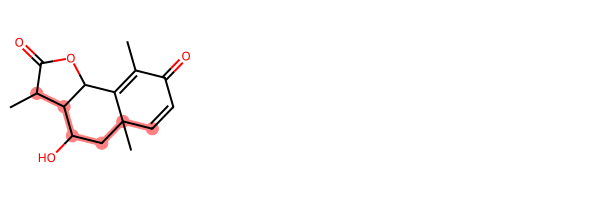

In [31]:
# Select any from the above list.
query = Chem.MolFromSmiles("C")
frags = [mol]

# Draw.MolToImage(mol, highlightAtomLists=[mol.GetSubstructMatch(query)])
Draw.MolsToGridImage([mol], highlightAtomLists=[(1,2,3,4,5,6)])

In [152]:
def atom_remover(mol,pattern):
    matches = mol.GetSubstructMatches(pattern)
    if not matches:
        yield Chem.Mol(mol)
    for match in matches:
        res = Chem.RWMol(mol)
        res.BeginBatchEdit()
        for aid in match:
            res.RemoveAtom(aid)
        res.CommitBatchEdit()

        display(Draw.MolToImage(res))
        # Chem.SanitizeMol(res)
        yield res

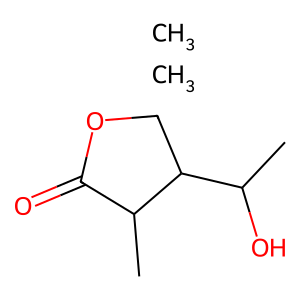

In [153]:
after = [x for x in atom_remover(mol, query)]

In [154]:
def get_scaffold(mol):
    s = MurckoScaffold.GetScaffoldForMol(mol)

    if Chem.MolToSmiles(s) == "":
        return mol
    return mol

In [155]:
smiles = Chem.MolToSmiles(after[0]).split(".")
smiles

['C', 'C', 'CC(O)C1COC(=O)C1C']

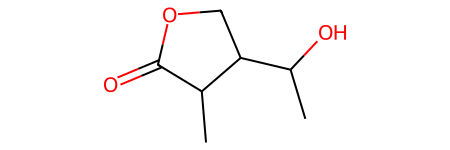

In [156]:
mmm = Chem.MolFromSmiles(smiles[2])
mmm

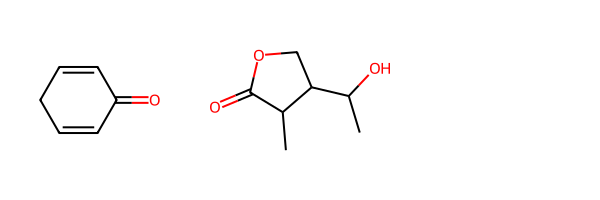

In [132]:
# warheads
Draw.MolsToGridImage([query, mmm])

In [157]:
w1 = Chem.MolToSmiles(query)
w2 = Chem.MolToSmiles(mmm)

w = w1 + '|' + w2
w

'O=C1C=CCC=C1|CC(O)C1COC(=O)C1C'

In [9]:
a = ['O=C1C=CC2CCC3CC(=O)OC3C2=C1',
 'O=C1C=CC2CCCCC2=C1',
 'C1CCCCC1',
 'O=C1CC2CCCCC2O1',
 'O=C1CCCO1',
 'O=C1C=CCC=C1']

In [11]:
mols = [Chem.MolFromSmiles(m) for m in a]

In [13]:
unique_paris = []

In [17]:
for m in mols:
    for n in mols:
        s1 = n.GetSubstructMatches(m)
        s2 = m.GetSubstructMatches(n)
        
        print(s1, s2, len(s1), len(s2), len(s1) + len(s2))
        if len(s1) + len(s2) == 0:
            unique_paris.append((n, m))

((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14),) ((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14),) 1 1 2
() ((0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14),) 0 1 1
() ((4, 5, 6, 7, 12, 13),) 0 1 1
() ((10, 9, 8, 7, 6, 5, 4, 13, 12, 11),) 0 1 1
() ((10, 9, 8, 7, 12, 11),) 0 1 1
() ((0, 1, 2, 3, 4, 13, 14),) 0 1 1
((0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14),) () 1 0 1
((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10),) ((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10),) 1 1 2
() ((4, 5, 6, 7, 8, 9),) 0 1 1
() () 0 0 0
() () 0 0 0
() ((0, 1, 2, 3, 4, 9, 10),) 0 1 1
((4, 5, 6, 7, 12, 13),) () 1 0 1
((4, 5, 6, 7, 8, 9),) () 1 0 1
((0, 1, 2, 3, 4, 5),) ((0, 1, 2, 3, 4, 5),) 1 1 2
((3, 4, 5, 6, 7, 8),) () 1 0 1
() () 0 0 0
() () 0 0 0
((10, 9, 8, 7, 6, 5, 4, 13, 12, 11),) () 1 0 1
() () 0 0 0
() ((3, 4, 5, 6, 7, 8),) 0 1 1
((0, 1, 2, 3, 4, 5, 6, 7, 8, 9),) ((0, 1, 2, 3, 4, 5, 6, 7, 8, 9),) 1 1 2
() ((0, 1, 2, 3, 8, 9),) 0 1 1
() () 0 0 0
((10, 9, 8, 7, 12, 11),) () 1 0 1
() () 0 0 0
() () 0 0 0
((0, 1, 2, 3, 8, 9),) () 1 0 1
(

In [19]:
len(unique_paris) // 2

6

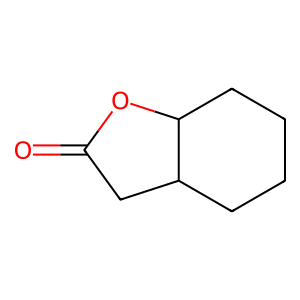

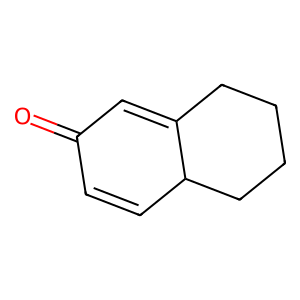

-----------------------------------


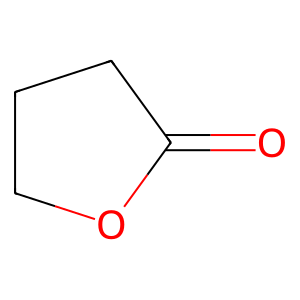

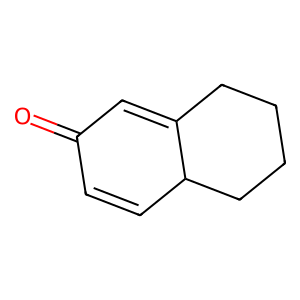

-----------------------------------


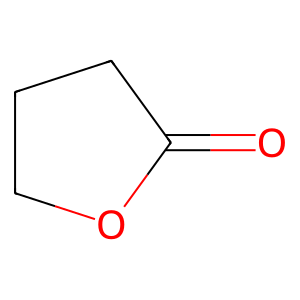

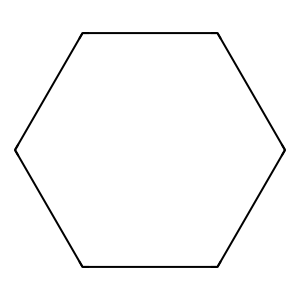

-----------------------------------


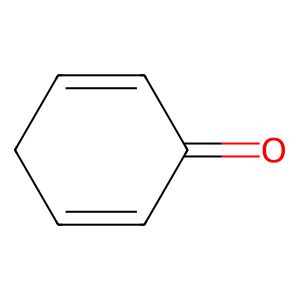

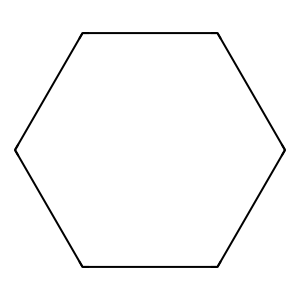

-----------------------------------


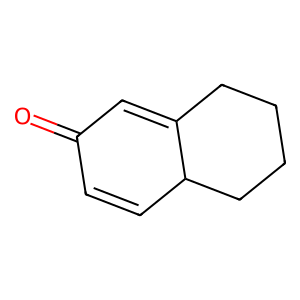

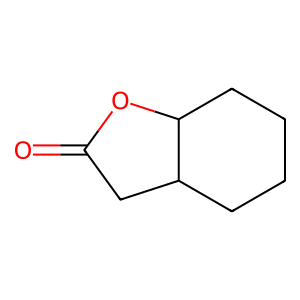

-----------------------------------


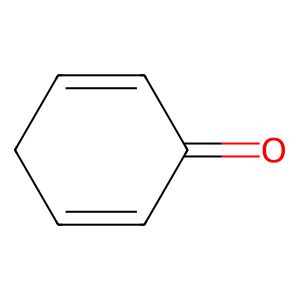

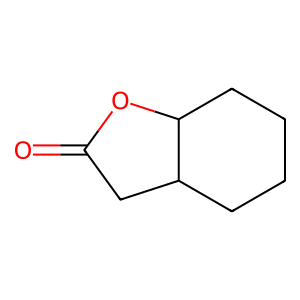

-----------------------------------


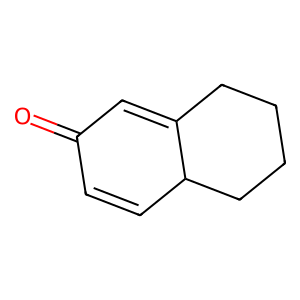

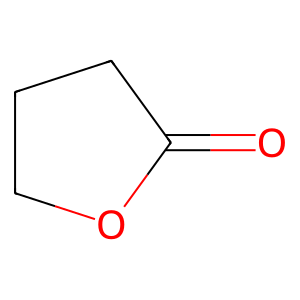

-----------------------------------


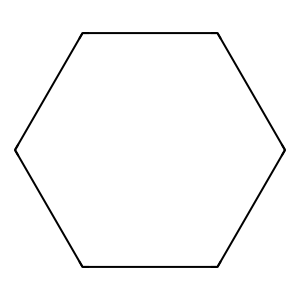

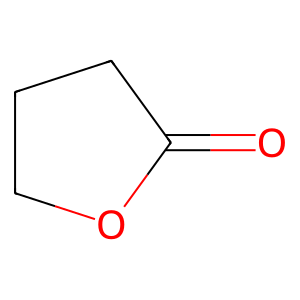

-----------------------------------


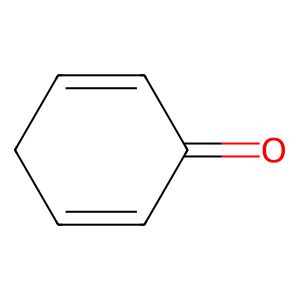

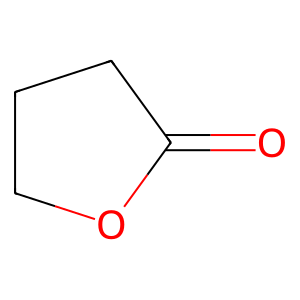

-----------------------------------


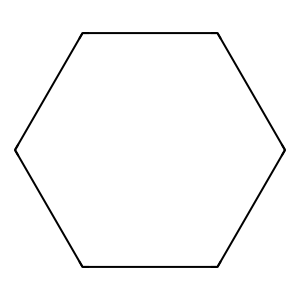

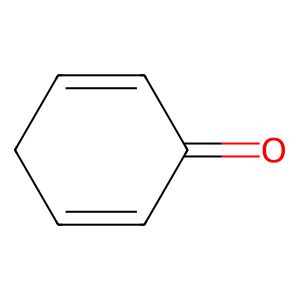

-----------------------------------


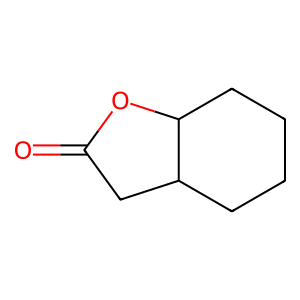

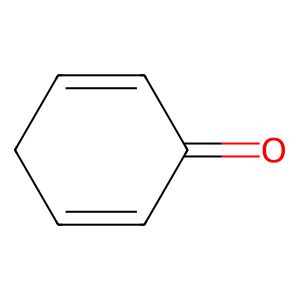

-----------------------------------


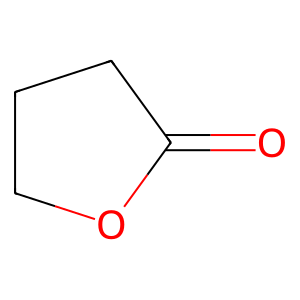

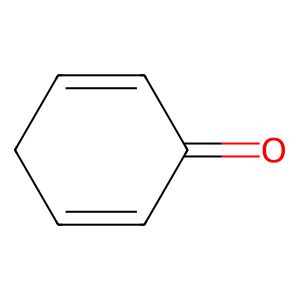

-----------------------------------


In [22]:
for a,b in unique_paris:
    display(Draw.MolToImage(a))
    display(Draw.MolToImage(b))
    print("-----------------------------------")

In [11]:
a = "CC(CCn1ccc2ccc3ccc(-c4nc5cncnc5[nH]4)cc3c21)OC[N+]([O-])(O)O,CC(CCc1cccc(NC(=O)C2(c3nc4cncnc4[nH]3)CCCC2)c1)OC[N+]([O-])(O)O,INVALID2,CC(CCOC(=O)c1ccc(-c2nc3ccccc3cc2Nc2nc3cncnc3[nH]2)cc1)OC[N+]([O-])(O)O,INVALID4,CC(CCC(O)c1cc(COC(=O)Nc2ccccc2Nc2nc3cncnc3[nH]2)no1)OC[N+]([O-])(O)O,Cc1c(-c2nc3cncnc3[nH]2)c2ccccc2c2nc(CCC(C)OC[N+]([O-])(O)O)nn12,CC(COc1ccc(CNc2ncnc(N)c2-c2nc3cncnc3[nH]2)cc1)OC[N+]([O-])(O)O,Cc1cc(-c2nc3cncnc3[nH]2)ccc1-n1c(=O)c2ccccc2n(CCC(C)OC[N+]([O-])(O)O)c1=O,CC(Cc1ccc(OCC(C)OC[N+]([O-])(O)O)cc1)Nc1cccc(-c2nc3cncnc3[nH]2)c1"
a = a.split(",")
mols = [Chem.MolFromSmiles(m) for m in a]

[16:48:32] SMILES Parse Error: syntax error while parsing: INVALID2
[16:48:32] SMILES Parse Error: Failed parsing SMILES 'INVALID2' for input: 'INVALID2'
[16:48:32] SMILES Parse Error: syntax error while parsing: INVALID4
[16:48:32] SMILES Parse Error: Failed parsing SMILES 'INVALID4' for input: 'INVALID4'


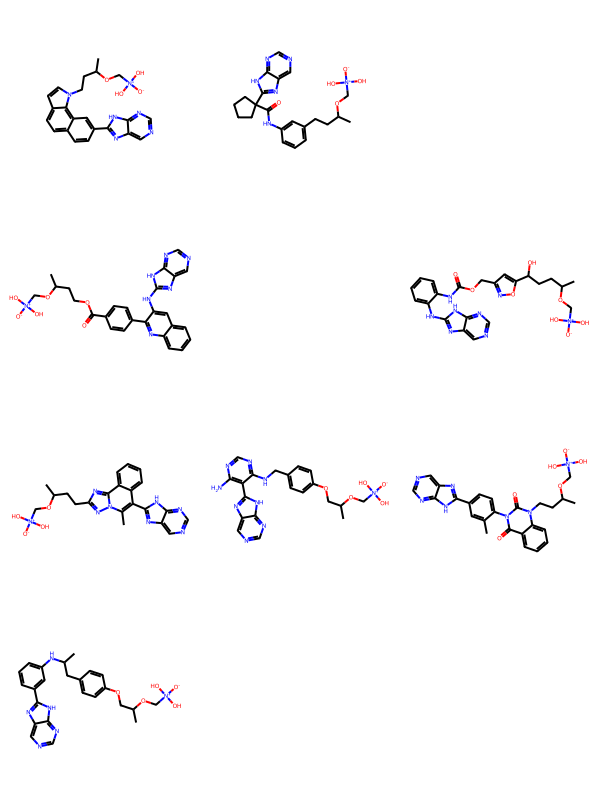

In [12]:
Draw.MolsToGridImage(mols)